In [22]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%autoreload 2
%matplotlib inline

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from sklearn.preprocessing import minmax_scale, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE, LocallyLinearEmbedding, MDS

def add_dimreds(df):
        
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    ndf = df.select_dtypes(include=numerics)
    ndf = ndf.iloc[:,:-1].copy()
    
    print('Applying UMAP..')
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(ndf)
    df['umap1'] = embedding[:,0]
    df['umap2'] = embedding[:,1]
    
    print('Applying PCA..')
    pca = PCA(n_components=3, whiten=True)
    embedding = pca.fit_transform(ndf) 
    df['pca1'] = embedding[:,0]
    df['pca2'] = embedding[:,1]
    
    print('Applying Isomap..')
    iso = Isomap(n_components=2, n_neighbors=3)
    embedding = iso.fit_transform(ndf) 
    df['iso1'] = embedding[:,0]
    df['iso2'] = embedding[:,1]
    
    print('Applying LLE..')
    lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
    embedding = lle.fit_transform(ndf) 
    df['lle1'] = embedding[:,0]
    df['lle2'] = embedding[:,1]
    
    print('Applying tSNE..')
    tsne = TSNE(n_components=2)
    embedding = tsne.fit_transform(ndf) 
    df['tsn1'] = embedding[:,0]
    df['tsn2'] = embedding[:,1]
    
    print('Applying non-metric MDS..')
    mds = MDS(n_components=2, metric=False)
    embedding = mds.fit_transform(ndf) 
    df['mds1'] = embedding[:,0]
    df['mds2'] = embedding[:,1]
    
    dr_cols = ['pca1', 'pca2', 'iso1', 'iso2', 'tsn1', 'tsn2', 'lle1', 'lle2', 'umap1', 'umap2', 'mds1', 'mds2']
    
    df = df[dr_cols + list(ndf.columns) + ['class']]
    df.loc[:, dr_cols+ list(ndf.columns)] = minmax_scale(df.loc[:, dr_cols + list(ndf.columns)])
    

    return df

In [47]:
df = pd.read_csv('/Users/morarica/Developer/SepMe/data/orig_data/input_data/Orig_data/fisheries_clusteredByEscapementTarget.csv')

In [48]:
df2 = add_dimreds(df)

Applying UMAP..
Applying PCA..
Applying Isomap..
Applying LLE..
Applying tSNE..


/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


Applying non-metric MDS..


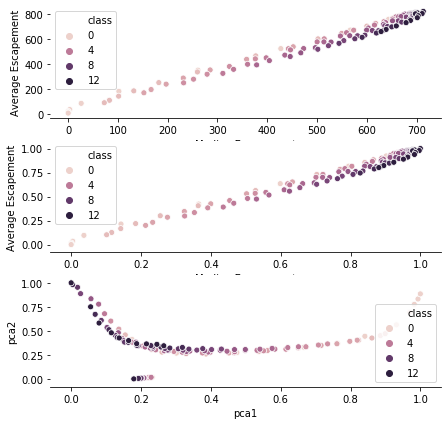

In [60]:
f, axes = plt.subplots(3, 1, figsize=(7, 7))
sns.despine(left=True)

sns.scatterplot(x="Median Escapement", y="Average Escapement", hue="class", data=df, ax = axes[0])
sns.scatterplot(x="Median Escapement", y="Average Escapement", hue="class", data=df2, ax = axes[1])

sns.scatterplot(x="pca1", y="pca2", hue="class", data=df2, ax = axes[2])




In [64]:
df_pca

,1,2,3,4,5,6,7,8,9,10,11,12,class
0,-170.226648,305.936522,141.346701,44.186692,-1.905739,-7.939982,13.172516,8.016873,-9.656574,-4.577880,5.200557,0.131471,0
1,-243.506380,-32.697258,48.665257,49.194225,-25.266288,-15.625951,6.602034,6.169692,1.008748,1.622190,-0.730676,-0.362953,0
2,-83.209850,90.345837,35.501703,32.820358,-36.533741,-20.598741,-10.050489,-2.026097,5.101685,1.283567,0.282418,0.213585,0
3,134.664261,85.457689,-9.348830,36.257385,-51.427448,8.056464,-15.137711,5.532192,-1.264843,-3.935508,2.969301,0.809574,0
4,375.503400,37.584143,-31.031358,57.580052,-43.726949,18.365880,-12.674469,6.396093,-1.609976,3.579486,-1.296908,-0.508564,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-255.213242,-22.062408,0.015287,-29.777796,23.721951,6.092860,-7.886129,6.665612,2.031763,-0.410721,0.184824,-0.055282,10
117,-226.258569,5.686190,-10.295739,-42.531415,19.396936,4.256252,-6.919776,6.494422,1.195966,-0.003457,0.116330,-0.166561,10
118,-190.998406,7.773722,-21.332436,-47.968716,20.577809,2.236408,-5.195368,5.806089,0.124501,0.395768,-0.679894,0.191675,10
119,-153.450380,11.598822,-31.459641,-52.434594,22.589493,-0.138050,-3.359903,5.892696,-0.775211,1.298580,0.266891,-0.336969,10


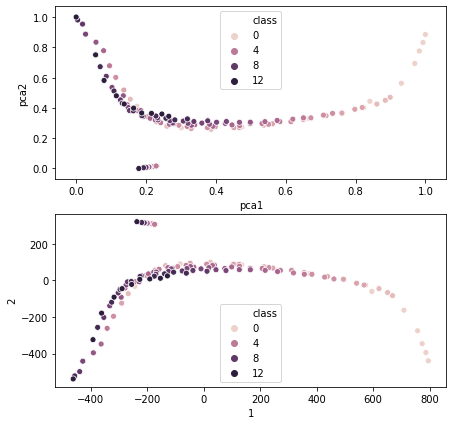

In [66]:
df_pca = pd.read_csv('/Users/morarica/Developer/SepMe/data/orig_data/input_data/Reduced_orig_data/PCA/fisheries_clusteredByEscapementTarget_PCA_data.csv')

f, axes = plt.subplots(2, 1, figsize=(7, 7))

sns.scatterplot(x="pca1", y="pca2", hue="class", data=df2, ax = axes[0])
sns.scatterplot(x="1", y="2", hue="class", data=df_pca, ax = axes[1])




In [68]:
from pydataset import data

initiated datasets repo at: /Users/morarica/.pydataset/


In [71]:
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001
